In [42]:
include("Create_Sample.jl")
include("MIP_SPLIT.jl")
include("Split.jl")
include("GA.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Neighborhood.jl")
include("Neighborhood_intra.jl")
include("costs.jl")
include("Draw.jl")
include("Escape.jl")

Escape_local_optima (generic function with 1 method)

In [43]:
instances = [:eil51, :berlin52, :eil76, :rat99]
LKH3 = [[222.7, 159.6, 124.0, 112.1],[4110.2, 3184.2, 2440.9, 2440.9], [280.9, 196.7, 143.4, 128.2],[690.8, 523.3, 467.0,442.5]]
Ms = [2, 3, 5, 7]

best_v = Float64[]
Avg_v = Float64[]
worst_v = Float64[]


count = 0
best_ = 0.0
Avg_ = 0.0
worst_ = 0.0
time_ = 0.0
P = Chromosome[]
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
roullet_ = zeros(Int, 5)
counter_n = zeros(Int, 25)
counter_cr = zeros(Int, 7)
for (i,instance) in enumerate(instances)
    for (j,K) in enumerate(Ms)
        count += 1
        T = Read_TSPLIB_instance(instance, 1)
        n = size(T)[1]-2
        demands = ones(Int, n)
        W = 150
        h = 0.3
        popsize = (20,50)
        k_tournament = 3
        num_iter = 2000
        Mutation_Chance = 0.0
        num_runs = 10
        num_nei = 2
        avg = 0.0
        best = Inf
        worst = 0.0
        t1 = time() 
        P = Chromosome[]
        for i=1:num_runs
            P, roullet = Perform_Genetic_Algorithm(T, demands,K, W, h, popsize, 
                k_tournament, num_iter, Mutation_Chance, num_nei, counter_n, counter_cr);
#             roullet_ = roullet_ + roullet
            avg += P[1].fitness
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
        end
        t2 = time()
        println("Results for ", instance, " ,m=", K)
        println("Best: ", round(best, digits = 1), "  Average: ", round(avg/num_runs, digits = 1), 
            "  Worst: ", round(worst, digits = 1), " , run time= ", round((t2-t1)/num_runs, digits=0))
        best_ += 100*(best-LKH3[i][j])/LKH3[i][j]
        worst_ += 100*(worst-LKH3[i][j])/LKH3[i][j]
        Avg_ += 100*(avg/num_runs-LKH3[i][j])/LKH3[i][j]
        time_ += t2-t1
    end
end
push!(best_v, best_/count)
push!(worst_v, worst_/count)
push!(Avg_v, Avg_/count)
println("Results:  Best: ", round(best_/count, digits=1), "  Average: ", round(Avg_/count, digits=1), "  Worst: ", round(worst_/count, digits=1), "   run time: ", round(time_/count, digits=1))


Results for eil51 ,m=2
Best: 223.1  Average: 227.9  Worst: 237.7 , run time= 1.0
Results for eil51 ,m=3
Best: 168.5  Average: 170.0  Worst: 172.7 , run time= 1.0
Results for eil51 ,m=5
Best: 122.9  Average: 126.0  Worst: 129.0 , run time= 1.0


LoadError: InterruptException:

In [30]:
sortperm(counter_n, rev=true)[1:7]

7-element Vector{Int64}:
  1
  9
  5
  2
 11
  6
  3

In [35]:
counter_n

25-element Vector{Int64}:
 1546
  191
  102
  194
  100
  262
  201
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0

Tour 1:
31 10 37 48 9 38 32 44 14 43 41 18 39 40 12 24 13 23 42 6 22 47 5 26 
cost=225.2333319859696
Tour 2:
21 7 25 30 27 2 35 34 19 1 28 20 15 49 33 29 8 4 36 16 3 17 46 11 45 50 
cost=224.35020688502289


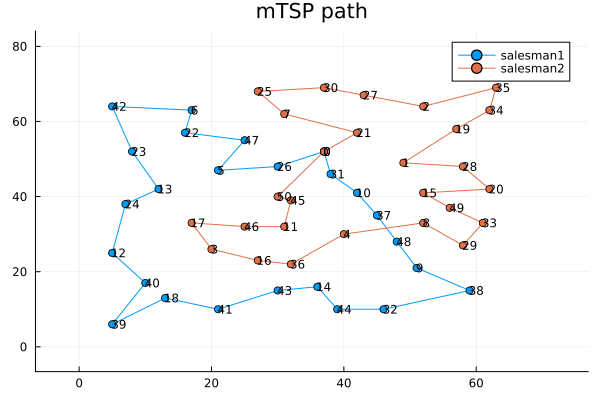

In [388]:
tsp = readTSPLIB(:eil51)
allNodes = tsp.nodes
num_of_nodes = size(allNodes)[1] - 1
depot = allNodes[1, :]
Customers = allNodes[2:num_of_nodes+1, :]

Draw_Solution(best_chrm, depot, Customers)

Tour 1:
47 22 42 23 24 12 40 39 18 41 43 14 44 32 38 9 29 33 49 15 20 28 1 
cost=235.5647669154171
Tour 2:
21 19 34 35 2 27 30 7 25 6 5 13 17 3 16 36 46 11 4 48 8 37 10 31 45 50 26 
cost=238.16260801632237


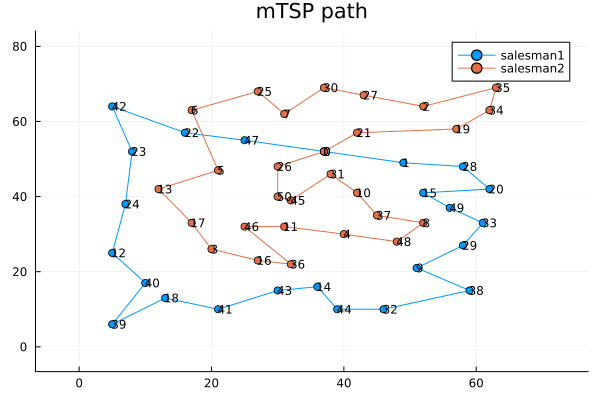

In [184]:
Draw_Solution(worst_chrm, depot, Customers)

In [182]:
include("Mutation.jl")
test_chrm = deepcopy(worst_chrm)

test_chrm = new_mutation(test_chrm, T, 0.2)

Chromosome([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 269.2699999426864, 202.13648895472298, Tour[Tour([47, 42, 23, 24, 12, 40, 39, 18, 41, 43  …  32, 38, 9, 29, 49, 15, 20, 28, 35, 1], 269.2699999426864), Tour([21, 19, 34, 2, 27, 30, 7, 25, 6, 22  …  4, 48, 33, 8, 37, 10, 31, 45, 50, 26], 247.3426190886282)])

Tour 1:
47 42 23 24 12 40 39 18 41 43 14 44 32 38 9 29 49 15 20 28 35 1 
cost=269.2699999426864
Tour 2:
21 19 34 2 27 30 7 25 6 22 5 13 17 3 16 36 46 11 4 48 33 8 37 10 31 45 50 26 
cost=247.3426190886282


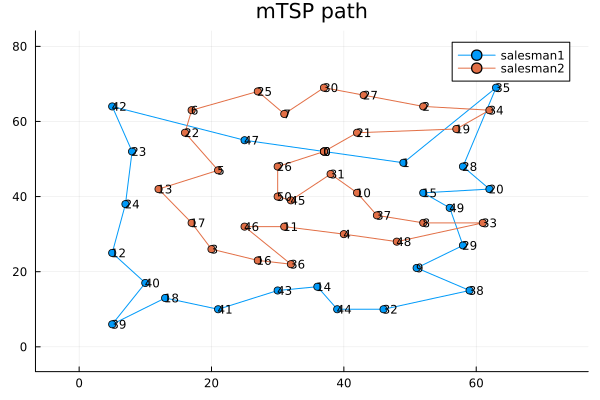

In [183]:
Draw_Solution(test_chrm, depot, Customers)

In [165]:
include("Neighborhood.jl")
demands = ones(Int, n_nodes)
W = 150
h = 1.0
Close_nodes= Find_Closeness(T, h) 
roullet = ones(Int, 25)
for i=1:10
    Improve_chromosome(test_chrm, T, Close_nodes, demands, W, n_nodes, roullet)
end

Tour 1:
47 6 42 23 24 12 40 39 18 41 43 14 44 32 38 9 29 33 49 15 20 28 1 
cost=236.66212072549598
Tour 2:
21 19 34 35 2 27 30 7 25 22 5 13 17 3 16 36 46 11 4 48 8 37 10 31 45 50 26 
cost=237.22653469995578


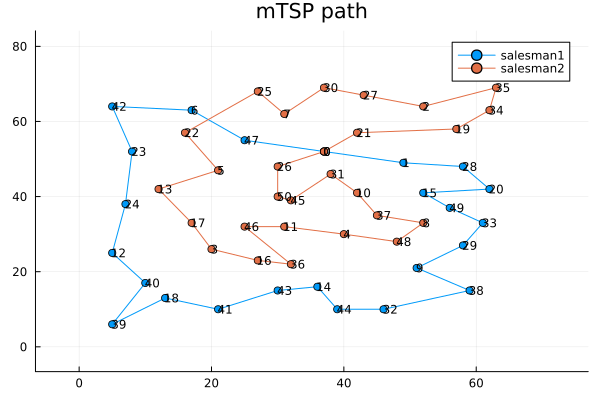

In [100]:
Draw_Solution(subs[1], depot, Customers)

In [320]:
test_chrm = deepcopy(worst_chrm_)
test_chrm = chunk_mutation_rand(test_chrm, T, 5)
println(test_chrm.fitness)
P = [test_chrm]
include("Escape.jl")
P1 = deepcopy(P)
T = Read_TSPLIB_instance(:eil51, 1)
n_nodes = size(T)[1]-2
demands = ones(Int, n_nodes)
W = 150
h = 1.0
Close_nodes= Find_Closeness(T, h) 
turn = 1
iter = 100000
max_size = 20
allowed_diff = 0.1
elite = 3
subs, fs = Escape_local_optima(P1, T, Close_nodes, demands, W, n_nodes, turn, iter, max_size, allowed_diff, elite);

249.967


In [321]:
fs

20-element Vector{Vector{Float64}}:
 [241.657, 243.7863]
 [243.6365, 245.0352]
 [244.5019, 245.0352]
 [255.8693, 257.9692]
 [262.8539, 263.3177]
 [256.6342, 263.0838]
 [255.0715, 266.7291]
 [247.1365, 256.6342]
 [243.6365, 260.9863]
 [246.1749, 265.2054]
 [256.2639, 265.7585]
 [254.6756, 263.3599]
 [266.5521, 266.9155]
 [256.6342, 264.0605]
 [244.5019, 259.2561]
 [241.657, 254.6756]
 [264.18, 265.2054]
 [245.0352, 266.4148]
 [252.4483, 266.2178]
 [260.8681, 262.551]

In [62]:
subs[2]

Chromosome([31, 26, 47, 5, 50, 45, 11, 46, 17, 3  …  43, 14, 44, 32, 38, 9, 8, 49, 15, 1], 230.84501597996152, 186.25164716336513, Tour[Tour([31, 26, 47, 5, 50, 45, 11, 46, 17, 3  …  33, 20, 28, 19, 34, 35, 2, 27, 30, 21], 227.98908518967033), Tour([7, 25, 6, 22, 42, 23, 13, 24, 12, 40  …  43, 14, 44, 32, 38, 9, 8, 49, 15, 1], 230.84501597996152)])

In [108]:
function find_tour_length(tt::Vector{Int}, T::Matrix{Float64})
    t = copy(tt)
    pushfirst!(t, 0)
    push!(t, 0)
    z = 0.0
    for i = 1:length(t)-1
        z += T[t[i]+1, t[i+1]+1]
    end
    return z
end

find_tour_length (generic function with 1 method)

In [101]:
a

4-element Vector{Int64}:
 1
 2
 3
 5

In [103]:
vcat(a, a[2:3])

6-element Vector{Int64}:
 1
 2
 3
 5
 2
 3

In [147]:
sortperm(b)

25-element Vector{Int64}:
 20
 19
 18
 21
 14
 15
 13
 24
 23
 25
 22
  4
 17
 16
 10
  2
  8
  7
 11
 12
  3
  6
  5
  9
  1

In [185]:
best_chrm_ = deepcopy(best_chrm)
worst_chrm_ = deepcopy(worst_chrm)

Chromosome([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237, 202.13648895472298, Tour[Tour([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  32, 38, 9, 29, 33, 49, 15, 20, 28, 1], 235.5647669154171), Tour([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237)])

In [231]:
function chunk_mutation(chrm::Chromosome, T::Matrix{Float64}, chunk_length::Int)
    m = length(chrm.tours)
    chunks = Vector{Vector{Int}}()
    for tour in chrm.tours
        nt = length(tour.Sequence)
        for i = 1:Int(ceil(nt/chunk_length))
            push!(chunks, tour.Sequence[(i-1)*chunk_length+1:min(nt,i*chunk_length)])
        end
    end
    new_tours = Tour[]
    for i=1:m
        push!(new_tours, Tour(Int[],0.0))
    end 

    last_added_tour = zeros(m) 

    while length(chunks) > 0
        best_chunk = 0
        least_distance = Inf
        best_tour = 0
        reverse_ = false
        tours_indices = findall(x->x==0, last_added_tour)
        for i in tours_indices
            nt = length(new_tours[i].Sequence)
            last_node = 0
            if nt > 0
                last_node = new_tours[i].Sequence[nt]
            end
            for (j,chunk) in enumerate(chunks)
                if length(chunks) > m
                    if T[last_node+1, chunk[1]+1] < least_distance
                        best_tour = i
                        best_chunk = j
                        least_distance = T[last_node+1, chunk[1]+1]
                        reverse_ = false
                    elseif T[last_node+1, chunk[length(chunk)]+1] < least_distance
                        best_tour = i
                        best_chunk = j
                        least_distance = T[last_node+1, chunk[length(chunk)]+1]
                        reverse_ = true
                    end
                else
                    if T[last_node+1, chunk[1]+1] + T[chunk[length(chunk)]+1, n_nodes+2] < least_distance
                        best_tour = i
                        best_chunk = j
                        least_distance = T[last_node+1, chunk[1]+1] + T[chunk[length(chunk)]+1, n_nodes+2]
                        reverse_ = false
                    elseif T[last_node+1, chunk[length(chunk)]+1] + T[chunk[1]+1, n_nodes+2] < least_distance
                        best_tour = i
                        best_chunk = j
                        least_distance = T[last_node+1, chunk[length(chunk)]+1] + T[chunk[1]+1, n_nodes+2]
                        reverse_ = true
                    end
                end
            end
        end
        if reverse_
            new_tours[best_tour].Sequence = vcat(new_tours[best_tour].Sequence, reverse(chunks[best_chunk]))
        else
            new_tours[best_tour].Sequence = vcat(new_tours[best_tour].Sequence, chunks[best_chunk])
        end
        last_added_tour[best_tour] += 1
        deleteat!(chunks, best_chunk)
        if sum(last_added_tour) == m
            last_added_tour = zeros(m)
        end
    end
    new_chrm = Chromosome(Int[], 0.0, 0.0, new_tours)
    for tour in new_tours
        tour.cost = find_tour_length(tour.Sequence, T)
        new_chrm.genes = vcat(new_chrm.genes, tour.Sequence)
        if tour.cost > new_chrm.fitness
            new_chrm.fitness = tour.cost
        end
    end
    return new_chrm
end

chunk_mutation (generic function with 1 method)

In [229]:
new_chrm

Chromosome([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  46, 36, 16, 3, 17, 13, 5, 20, 28, 1], 305.18816929080623, 0.0, Tour[Tour([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  43, 14, 44, 32, 38, 9, 29, 33, 49, 15], 305.18816929080623), Tour([26, 50, 45, 31, 10, 37, 8, 48, 4, 11, 46, 36, 16, 3, 17, 13, 5, 20, 28, 1], 200.84612723333848)])

In [322]:
chrm= deepcopy(worst_chrm_)
include("Mutation.jl")
new_chrm = chunk_mutation_rand(chrm, T, 5)

Chromosome([50, 26, 47, 7, 27, 30, 25, 6, 22, 42  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607, 0.0, Tour[Tour([50, 26, 47, 7, 27, 30, 25, 6, 22, 42, 23, 24, 43, 14, 44, 32, 38, 20, 28, 1], 247.842), Tour([31, 10, 45, 5, 13, 17, 12, 40, 39, 18  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607)])

In [323]:
chrm

Chromosome([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237, 202.13648895472298, Tour[Tour([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  32, 38, 9, 29, 33, 49, 15, 20, 28, 1], 235.5647669154171), Tour([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237)])

In [324]:
new_chrm

Chromosome([50, 26, 47, 7, 27, 30, 25, 6, 22, 42  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607, 0.0, Tour[Tour([50, 26, 47, 7, 27, 30, 25, 6, 22, 42, 23, 24, 43, 14, 44, 32, 38, 20, 28, 1], 247.842), Tour([31, 10, 45, 5, 13, 17, 12, 40, 39, 18  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607)])

Tour 1:
47 22 42 23 24 12 40 39 18 41 43 14 44 32 38 9 29 33 49 15 20 28 1 
cost=235.5647669154171
Tour 2:
21 19 34 35 2 27 30 7 25 6 5 13 17 3 16 36 46 11 4 48 8 37 10 31 45 50 26 
cost=238.16260801632237


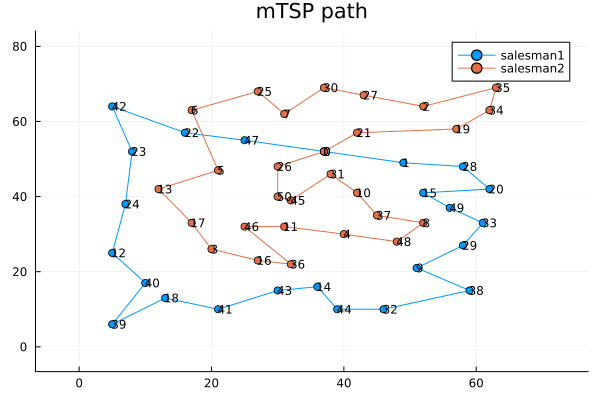

In [309]:
Draw_Solution(worst_chrm_, depot, Customers)

Tour 1:
27 30 25 7 47 22 6 42 23 24 12 40 39 18 41 9 29 33 49 15 8 37 10 31 45 50 26 
cost=272.405
Tour 2:
21 2 35 34 19 1 28 20 48 38 32 44 14 43 16 36 4 11 46 3 17 13 5 
cost=236.328


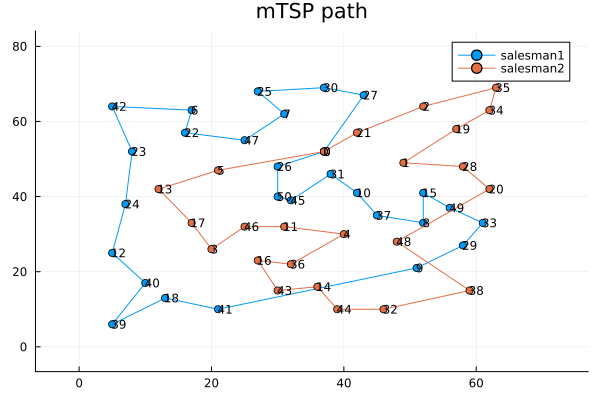

In [310]:
Draw_Solution(new_chrm, depot, Customers)

In [279]:
t1 = copy(new_chrm.tours[1].Sequence)
pushfirst!(t1, 0)


tt1, z1 = find_tsp_tour1(T[t1.+1, t1.+1])
ttt1 = new_chrm.tours[1].Sequence[tt1]
t2 = copy(new_chrm.tours[1].Sequence)
pushfirst!(t2, 0)


tt2, z2 = find_tsp_tour1(T[t2.+1, t2.+1])
ttt2 = new_chrm.tours[2].Sequence[tt2]

25-element Vector{Int64}:
 49
 15
 16
  3
 18
 41
  1
 20
 33
 28
 29
  9
 12
 26
 40
 39
 38
 50
 32
 44
 17
 13
  5
 43
 14

In [280]:
sort(vcat(ttt1, ttt2))

50-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 39
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50

In [282]:
z2

241.815

In [266]:
setdiff(Set(t1), Set(tt2))

Set{Int64} with 1 element:
  0